# Extra Part: Theory/Definitions

##  Detecting Functional RNA Structures with SISSIz

SISSIz is a specialized tool used in comparative genomics to predict **functional RNA structures** by comparing the stability of native RNA alignments to randomized ones that preserve nucleotide patterns.

---

## 1. Understanding the Science Behind SISSIz: Evolution and RNA Structure
### A. Why Compare RNA Structures?

RNA molecules often fold into stable secondary structures that play functional roles (e.g., ribozymes, riboswitches). These structures are conserved through evolution.

> The goal: detect unusually stable consensus RNA structures that are more conserved than expected by chance.

### B. The Concept of Structure Conservation

When multiple homologous RNA sequences are aligned:
- Conserved **base-pairing patterns** suggest a shared secondary structure.
- Algorithms like **RNAalifold** can compute a consensus structure and its folding energy (MFE = Minimum Free Energy).

### C. Null Models and Z-Scores

To decide if the observed MFE is "unusually" stable:
- Create **randomized alignments** that preserve dinucleotide content and phylogenetic signals.
- Compare the original MFE to a distribution of MFEs from randomized alignments.
- Use a **z-score**:

$z = \frac{E_\text{native} - \mu_\text{random}}{\sigma_\text{random}}$

- A **negative z-score** (e.g. -2.5) implies stronger structure conservation than expected by chance.

---

## 2. What Is SISSIz and How Does It Work?

SISSIz is a tool developed to generate these randomized alignments and calculate significance scores.

### A. Key Capabilities

| Feature | Description |
|--------|-------------|
| **Randomization** | Generates alignments preserving **mono- or dinucleotide content** |
| **Phylogenetic model** | Uses a **simulation model** guided by phylogenetic trees |
| **Z-score computation** | Compares real vs. randomized structures using **RNAalifold** |
| **Formats** | Accepts **CLUSTAL W** and **MAF** formats for input alignments |
| **Simulation-only mode** | Generates randomized alignments without RNA analysis |

### B. Output Explained

When computing z-scores, the output includes:

| Field | Meaning |
|-------|---------|
| Model | "sissiz-mono" or "sissiz-di" |
| Input file | Alignment file name |
| N_seq | Number of sequences |
| MPI | Mean pairwise identity |
| MFE (real) | Folding energy of original alignment |
| MFE (random) | Mean and std. dev. of random alignments |
| **z-score** | Significance of structure conservation |

---

- SISSIZ version 3.0


# Task 1: Blast

Download the sequences of Jurassic Park.

1)	Try a blastn search using the first sequence against the nucleotide non-redundant (nr) database to find out what the sequence might be. 

- Do you really believe what Dr. Wu is claiming in the movie?

**Answer**: All top hits match to expression vectors and some synthetic constructs like pACTEM1, pDEST17 etc. The organisms are listed as synthetic or unknown meaning that these are lab-engineered plasmids, not biological genomes from a real organism. Most of the sequence aligned (coverage 97.99%) and the E-value is low so the match is statistically strong. These results suggest the sequence is not from a dinosaur, but from a synthetic lab vector, likely used for cloning or gene expression in experiments.

This strongly implies that Dr. Wu’s “dino DNA” is fake or contaminated with lab plasmids.

2)	Try a blastn search using the second sequence against the nucleotide non-redundant (nr) database to find out what the sequence might be. 

- Is the result better?

![alt text](image.png)

**Answer**: Top hit is allus gallus GATA binding protein 1 (globin transcription factor 1) with query coverage of 67% and percent identity 95.61% and E-value of 0.0 (very statistically significant). Among other hits are bird, frog, turtle and rodent species. 

This result is more biologically meaningful than the first, but again suggests the DNA is from a modern organism not a dinosaur. The frog DNA that is also identified was perhaps used to fill in the gaps like the movie snippet explained which is why it also appears in the result.

3)	Use a blastx search of the second sequence: Consider the alignment carefully!
 
![alt text](image-1.png)

When translated into protein, the sequence matches an erythroid transcription factor from Gallus gallus with 95.6% identity and E-value = 1e-113. The alignment is strong and clear, indicating this is a real avian protein-coding gene. If we had real dinosaur DNA, we would expect a more fragmented alignment as it would have gotten damaged over time.


# Task 2: Alignment and consensus structure

## Task description

I was assigned the RFAM family **RF01852** corresponding to **tRNA-Sec**. My sample contains 20 sequences and is named ``n20_file0083_sample_12.fasta``. 

Each RFAM family represents a set of evolutionarily related RNA sequences that are thought to share a conserved secondary structure. Goals of the assignment are to use tools like RNAalifold to find a consensus secondary structure and to assess how conserved/stable that structure is using metrics like MFE, SCI, and SISSIz z-scores.


## Steps and Results

**Step 1**: Alignment: I aligned the sequences in my fasta file using Clustal Omega. [clustal omega](https://www.ebi.ac.uk/Tools/msa/clustalo/) and saved the result in CLUSTAL format (.aln) for input into RNAalifold and SCI tools.

- Raw data: fasta file with 20 sequences from Rfam RF01852

**Step 2**: Predict RNA Consensus secondary structure using [RNAalifold](http://rna.tbi.univie.ac.at/cgi-bin/RNAWebSuite/RNAalifold.cgi). Secondary structure is exported as a plot and a MFE data.

**Results**

- The optimal secondary structure in dot-bracket notation with a minimum free energy of -56.74 (-27.15 plus -29.59 from covariance contributions) kcal/mol is given below.

``
GGAAG_AUGAUCGUCUCUGGUGGGGCGUCCGGACUUCAAAUCCGGUGGGGGG_GC_CAG__CGCUCCCGGGUAGGUUCGACUCCCACUUUCUUCC____
(((((.(((..((((((....)))))).(((((.......)))))...((((............))))..(((((.......)))))))))))))....  
``

- The free energy of the thermodynamic ensemble is -57.06 kcal/mol. The frequency of the MFE structure in the ensemble is 0.00 %.

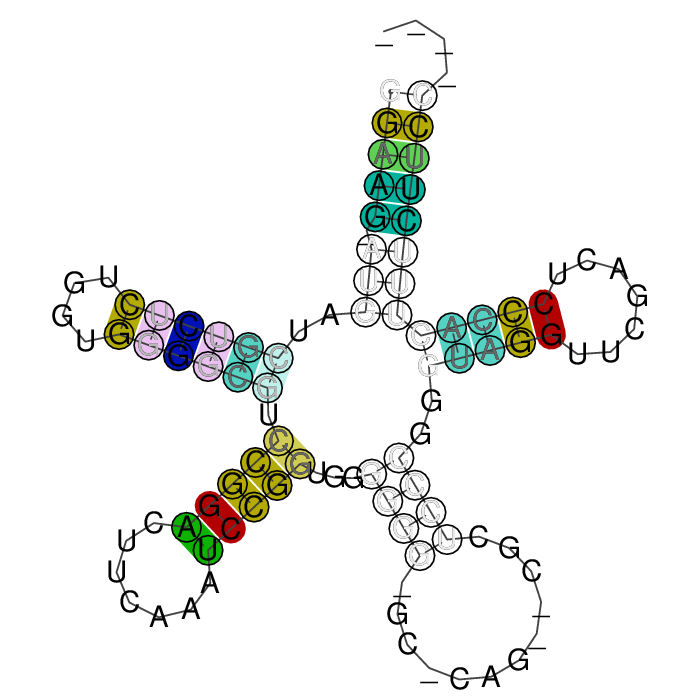


**Step 3**: Calculate SCI (Structure Conservation Index) on [RNAalifold SCI](http://rna.tbi.univie.ac.at/cgi-bin/RNAWebSuite/SCA.cgi). Input is the alignment file, output is the SCI value (between 0 and 1) -> noted in the report.

**Results**

SCI = 0.847 → Almost perfect structure preservation across aligned sequences.

z-score > 10 → Extremely rare under the null model (expected by chance).

p-value = 0.00 → Statistically highly significant.

**Conclusion: My alignment has much higher structure conservation than any of the randomized ones.**

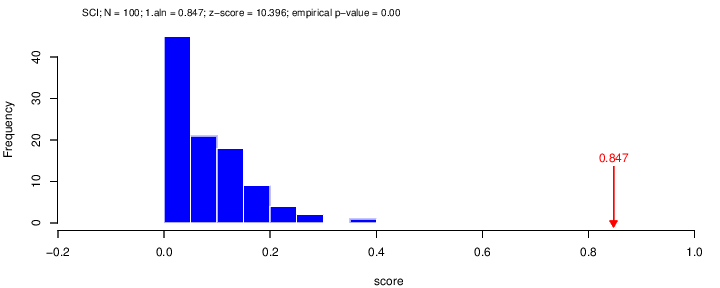

In the plot, each bar shows how many of the 100 random alignments (the null model) produced a particular SCI score.

Most random alignments have an SCI close to 0, those that are conserved closer to 1. No conserved structure -> null distribution.


# Task 3: SISSIz z-scores on alignment files

## Task Description

- Run SISSIz with the following command line parameters on the alignment file created in the
previous task:

``
(a) --mono
(b) --mono -j
(c) -- di
(d) -- di -j
``

- Example: ``SISSIz --di -- ribo n10 f0001 sampled1.aln``

- Write down the z-score of your alignment (last column of SISSIz output)
- Compute the the z-scores on the alignment files (B,C) assigned to me for this sample with the four command line parameters (SISSIz).

## Results

The SISSIz tool was run on the same aligned RNA file using both mono- and dinucleotide background models. The z-score quantifies how unusually conserved the RNA structure is compared to random alignments. Lower (more negative) z-scores indicate stronger structural conservation.


![WhatsApp Image 2025-05-26 at 19.45.15_b3e18ef8.jpg](<attachment:WhatsApp Image 2025-05-26 at 19.45.15_b3e18ef8.jpg>)


**A File**

````sh
===== SISSIz Output for /home/leona/Strukturvorhersagen/Project_2/A_output/A_clustal_n20_file0083_sample12.aln =====

--- Running: SISSIz --mono --sci ---
sissiz-mono	/home/leona/Strukturvorhersagen/Project_2/A_output/A_clustal_n20_file0083_sample12.aln	20	99	0.5822	0.6083	0.0140	0.7829	0.6065	-32.31	-0.89	1.30	-24.25

--- Running: SISSIz --mono -j --sci ---
sissiz-mono	/home/leona/Strukturvorhersagen/Project_2/A_output/A_clustal_n20_file0083_sample12.aln	20	99	0.5822	0.6083	0.0140	1.3866	0.6065	-57.23	-11.65	4.49	-10.15

--- Running: SISSIz --di --sci ---
sissiz-di	/home/leona/Strukturvorhersagen/Project_2/A_output/A_clustal_n20_file0083_sample12.aln	20	99	0.5822	0.6083	0.0136	0.7829	0.6065	-32.31	-0.84	1.64	-19.19

--- Running: SISSIz --di -j --sci ---
sissiz-di	/home/leona/Strukturvorhersagen/Project_2/A_output/A_clustal_n20_file0083_sample12.aln	20	99	0.5822	0.6083	0.0136	1.3866	0.6065	-57.23	-11.14	4.51	-10.21
````

**B File**

````sh
===== SISSIz Output for /home/leona/Strukturvorhersagen/Project_2/B/B_n20_file0083_sample12.aln =====

--- Running: SISSIz --mono --sci ---
sissiz-mono	/home/leona/Strukturvorhersagen/Project_2/B/B_n20_file0083_sample12.aln	20	119	0.6389	0.6585	0.0131	1.1361	0.6065	-46.89	-0.93	1.44	-31.92

--- Running: SISSIz --mono -j --sci ---
sissiz-mono	/home/leona/Strukturvorhersagen/Project_2/B/B_n20_file0083_sample12.aln	20	119	0.6389	0.6585	0.0131	1.8112	0.6065	-74.76	-10.58	4.82	-13.32

--- Running: SISSIz --di --sci ---
sissiz-di	/home/leona/Strukturvorhersagen/Project_2/B/B_n20_file0083_sample12.aln	20	119	0.6389	0.6597	0.0126	1.1361	0.6065	-46.89	-0.76	1.04	-44.18

--- Running: SISSIz --di -j --sci ---
sissiz-di	/home/leona/Strukturvorhersagen/Project_2/B/B_n20_file0083_sample12.aln	20	119	0.6389	0.6597	0.0126	1.8112	0.6065	-74.76	-8.98	4.01	-16.40
````


**C File**

````sh
===== SISSIz Output for /home/leona/Strukturvorhersagen/Project_2/C/C_n20_file0083_sample12.aln =====

--- Running: SISSIz --mono --sci ---
WARNING: SCI below 0.1
sissiz-mono	/home/leona/Strukturvorhersagen/Project_2/C/C_n20_file0083_sample12.aln	20	105	0.5568	0.5700	0.0122	-0.0000	0.7232	0.00	-0.23	0.58	0.39

--- Running: SISSIz --mono -j --sci ---
sissiz-mono	/home/leona/Strukturvorhersagen/Project_2/C/C_n20_file0083_sample12.aln	20	105	0.5568	0.5723	0.0126	0.2430	0.7232	-8.61	-7.32	3.25	-0.40

--- Running: SISSIz --di --sci ---
WARNING: SCI below 0.1
sissiz-di	/home/leona/Strukturvorhersagen/Project_2/C/C_n20_file0083_sample12.aln	20	105	0.5568	0.5730	0.0142	-0.0000	0.7232	0.00	-0.19	0.57	0.33

--- Running: SISSIz --di -j --sci ---
sissiz-di	/home/leona/Strukturvorhersagen/Project_2/C/C_n20_file0083_sample12.aln	20	105	0.5568	0.5711	0.0119	0.2430	0.7232	-8.61	-6.62	3.44	-0.58
````
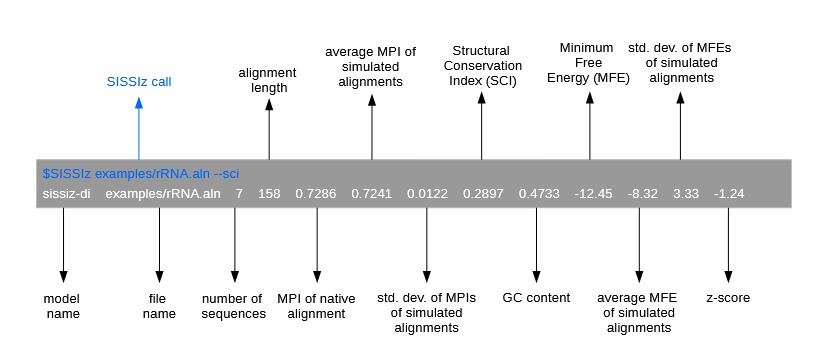

## Interpretation

### z-score and SCI Score: Structure Conservation Index

The SISSIz tool was run using four different parameter sets (--mono, --mono -j, --di, --di -j) on three RNA multiple sequence alignments (A, B, C). The goal was to assess the structural conservation of the alignments by examining the z-score and the Structure Conservation Index (SCI).

The z-score (last column in the output) quantifies how unusually stable the predicted consensus RNA structure is compared to randomized alignments. More negative z-scores indicate stronger evidence for evolutionary conservation.

z-score -> how many standard deviations a particular data point is from the mean of a distribution.

$
z \;=\; \frac{mfe \;-\; \mu}{\sigma}
$

The SCI (6th-to-last column) compares the energy of the consensus structure to the average energies of individual sequences. Values close to 1 indicate high structure conservation, while values below 0.1 suggest no meaningful conservation.

| File | Parameter   | SCI     | z-score |
| ---- | ----------- | ------- | ------- |
| A    | `--mono`    | 0.7829  | -24.25  |
| A    | `--mono -j` | 1.3866  | -10.15  |
| A    | `--di`      | 0.7829  | -19.19  |
| A    | `--di -j`   | 1.3866  | -10.21  |
| B    | `--mono`    | 1.1361  | -31.92  |
| B    | `--mono -j` | 1.8112  | -13.32  |
| B    | `--di`      | 1.1361  | -44.18  |
| B    | `--di -j`   | 1.8112  | -16.40  |
| C    | `--mono`    | -0.0000 | 0.39    |
| C    | `--mono -j` | 0.2430  | -0.40   |
| C    | `--di`      | -0.0000 | 0.33    |
| C    | `--di -j`   | 0.2430  | -0.58   |

File A and B show strong evidence of conserved RNA structure (high SCI and large negative z-scores), especially in the -j runs which use shuffling.

File B shows the strongest conservation overall (z = –44.18, SCI = 1.81).

File C has very low SCI (≤ 0.24) and near-zero or positive z-scores, indicating no structural conservation. This is also explicitly flagged by SISSIz as "SCI below 0.1".

## Interpretation: tRNA Seq

tRNA Sec is a special type of transfer RNA (tRNA) that incorporates the rare amino acid selenocysteine during translation.

High SCI values (>1) show that the consensus structure is as stable or more stable than individual sequences, which is typical for functional RNAs like tRNAs.

The very negative z-scores (especially in the --di model) show that this structure is far more stable than would be expected by chance — strong evidence for evolutionary structure conservation.

This matches biological expectations: tRNAs are among the most conserved and structured RNAs across life.

## Optional Task: Running simulation 10, 100 and 1000 times

**A**

```sh
===== Averaged Z-scores and SCI for /home/leona/Strukturvorhersagen/Project_2/A_output/A_clustal_n20_file0083_sample12.aln (N=10) =====
--mono → Avg z-score: -28.2130, Avg SCI: .7829 (n=10)
--mono -j → Avg z-score: -10.4220, Avg SCI: 1.3866 (n=10)
--di → Avg z-score: -31.0740, Avg SCI: .7829 (n=10)
--di -j → Avg z-score: -10.3560, Avg SCI: 1.3866 (n=10)
```

**B**
```sh
===== Averaged Z-scores and SCI for /home/leona/Strukturvorhersagen/Project_2/B/B_n20_file0083_sample12.aln (N=10) =====
--mono → Avg z-score: -36.5600, Avg SCI: 1.1361 (n=10)
--mono -j → Avg z-score: -14.7720, Avg SCI: 1.8112 (n=10)
--di → Avg z-score: -40.5450, Avg SCI: 1.1361 (n=10)
--di -j → Avg z-score: -15.2690, Avg SCI: 1.8112 (n=10)

```

**C**
```sh
===== Averaged Z-scores and SCI for /home/leona/Strukturvorhersagen/Project_2/C/C_n20_file0083_sample12.aln (N=10) =====
--mono → Avg z-score: .3650, Avg SCI: 0 (n=10)
--mono -j → Avg z-score: -.5400, Avg SCI: .2430 (n=10)
--di → Avg z-score: .2680, Avg SCI: 0 (n=10)
--di -j → Avg z-score: -.4060, Avg SCI: .2430 (n=10)

```


**A**
```sh
===== Averaged Z-scores and SCI for /home/leona/Strukturvorhersagen/Project_2/A_output/A_clustal_n20_file0083_sample12.aln (N=100) =====
--mono → Avg z-score: -24.8892, Avg SCI: .7829 (n=100)
--mono -j → Avg z-score: -10.2608, Avg SCI: 1.3866 (n=100)
--di → Avg z-score: -24.8002, Avg SCI: .7829 (n=100)
--di -j → Avg z-score: -10.5749, Avg SCI: 1.3866 (n=100)

```

**B**
```sh
===== Averaged Z-scores and SCI for /home/leona/Strukturvorhersagen/Project_2/B/B_n20_file0083_sample12.aln (N=100) =====
--mono → Avg z-score: -38.1082, Avg SCI: 1.1361 (n=100)
--mono -j → Avg z-score: -15.0518, Avg SCI: 1.8112 (n=100)
--di → Avg z-score: -41.3072, Avg SCI: 1.1361 (n=100)
--di -j → Avg z-score: -15.7556, Avg SCI: 1.8112 (n=100)

```

**C**
```sh
===== Averaged Z-scores and SCI for /home/leona/Strukturvorhersagen/Project_2/C/C_n20_file0083_sample12.aln (N=100) =====
--mono → Avg z-score: .3131, Avg SCI: 0 (n=100)
--mono -j → Avg z-score: -.5817, Avg SCI: .2430 (n=100)
--di → Avg z-score: .2933, Avg SCI: 0 (n=100)
--di -j → Avg z-score: -.4640, Avg SCI: .2430 (n=100)

```

**A**
```sh
===== Averaged Z-scores and SCI for /home/leona/Strukturvorhersagen/Project_2/A_output/A_clustal_n20_file0083_sample12.aln (N=1000) =====
--mono → Avg z-score: -24.6345, Avg SCI: .7829 (n=1000)
--mono -j → Avg z-score: -10.2927, Avg SCI: 1.3866 (n=1000)
--di → Avg z-score: -25.3468, Avg SCI: .7829 (n=1000)

```

# Task 4 Writing Scripts

I wrote two scripts to analyze all files in the folders B, C, D, E. The first script ran SISSIz with the four parameters (--mono, --mono -j, --di, --di, -j), saving the raw output in a txt file. The second script extracted the tab separated z-scores (last posision in the output) and saved them in a csv format for analysis.

**Question**: Which of the folders B and C contained the negative control alignments? How did you come to your conclusion?

**Answer**: I expected the outputs of the negative control alignments to produce z-values around 0, meaning no significance. Furthermore, the SCI which compares the predicted consensus secondary structure of an RNA alignment to the average structure of the individual sequences would likely be < 0.3 in the negative control group, signaling poor structural conservation or random alignments.

From the SISSIz outputs, files in folder B had high SCI scores significant z-scores while samples in folder C had significantly lower SCI scores (some below 0.1) and weakly significant z-scores around 0. Therefore, I conclude that folder C was the negative control group.

- B -> aligned sequence, has larger z-values translate to highest significance levels (p-values) but also there is variability between different families
- C -> negative control, it contains exactly the same sequences (same headers, same sample size N), but the columns have been scrambled or randomized so that any genuine covariation/structure signal is destroyed. We expect values near 0 for the z-scores (no significance) which we got in our results

## Mafft realignments (folders D and E)

Repeat the previous steps for folders D and E (they contain mafft realignments) Compare the results for the RFAM families in your first table. Do they match?

Folder D Z-scores:
- Many values are strongly negative, e.g., -12.84, -35.36, -20.91.
- These are highly significant, suggesting strong structural conservation.

Folder E Z-scores:
- Most Z-values are close to 0, occasionally slightly negative or positive but generally weak or non-significant.
- These alignments show no strong structural signal.

This pattern mirrors the results from the original alignments in folders B and C, respectively, suggesting that the structural signal (folder B → D) was preserved even after realignment. In contrast, the negative control group (folder C → E) remained structurally uninformative. These results confirm that the conserved structural signal detected by SISSIz is not an artifact of alignment method, and that real biological signal remains detectable following realignment with MAFFT.